In [1]:
# 딥러닝 할 떄는 t4 GPU 로 설정해놓고 진행

## 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## 데이터 형태 확인

In [2]:
train_images.shape # 3차원 배열

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
test_images.shape # 3차원 배열

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation = "relu"), # 입력
    layers.Dense(10, activation = 'softmax')# 출력. 10이 의미하는 것은 예측할 범주의 개수
                                            # 수치 예측의 경우에는 숫자 하나
])

## 컴파일 단계
- 어떤 형태로 훈련을 시킬 것이냐를 정의
- 경사하강법 : 기울기를 찾는데, step 을 어떤 식으로 정의하는 것
- 경사하강법의 종류도 되게 많음

In [8]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

## 이미지 데이터 준비
- 데이터를 모델에 맞는 크기로 변경
  + 주의, 이 때. 데이터 타입 변경(연산할 때, 데이터타입 매칭으로 인한 오류가 발생할 수 있음)
  + 기본값 float64, 텐서플로 기본값 float32

In [9]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [10]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9892


In [11]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 67ms/step


array([3.39344020e-08, 2.29528023e-08, 1.19436445e-05, 2.83659265e-05,
       1.62059411e-11, 1.76055384e-08, 3.11062916e-12, 9.99958754e-01,
       4.95462132e-07, 2.98618062e-07], dtype=float32)

In [12]:
predictions[0].argmax()

7

In [13]:
predictions[0][7]

0.99995875

In [14]:
test_labels[0]

7

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도 : {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9803
테스트 정확도 : 0.9803000092506409


- 정형데이터 활용
  + 전통적이 머신러닝(LightGBBM, 선형회귀)
  + 최신 딥러딩

- 알고리즘 차이
  + 딥러닝 : 궁극적인 목적, 기울기만 찾음 끝, 오차 최소화 해석이 굉장히 난해해짐
  + tabluar deep learning. tabnet

- 이미지, 텍스트 비정형 데이터
  + 어떻게 하면 분류 정확도를 높일지만 고민하면 됨
  + 딥러닝, 설명할 것이 없음(머신러닝은 해석이 필요함)


- 평가지표로 설명함!



## 기본 문법

### 스칼라(랭크 -0 텐서)

In [16]:
import numpy as np
x = np.array(12) # 스칼라 (값 1개)
x

array(12)

In [17]:
x.ndim

0

### 벡터(랭크 - 1- 텐서)

In [18]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.shape, x.ndim # 1차원 배열 = 랭크-1 텐서 = 벡터

((5,), 1)

## 행렬(랭크-2텐서)

In [20]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x.shape, x.ndim # 2차원 배열 = 랭크-2텐서 = 행렬

((3, 5), 2)

### 랭크-3텐서 더 높은 랭크의 텐서

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.shape, x.ndim

((3, 3, 5), 3)

## 데이터 다시보기

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [24]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [25]:
train_images.ndim

3

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images.dtype

dtype('uint8')

### 이미지 출력

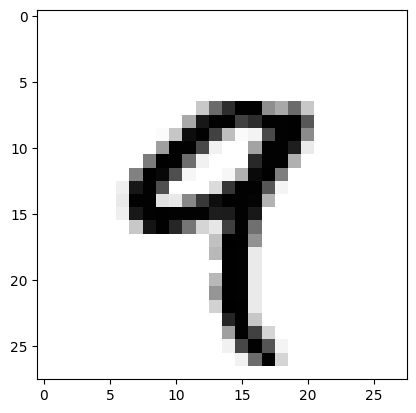

In [30]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [31]:
import matplotlib.pyplot as plt
digit = train_images[4]
#plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [32]:
train_labels[4]

9

## 넘파이로 텐서 조작하기

- 슬라이싱

In [33]:
my_slice = train_images[10:100] # 90개의 이미지를 가져오겠다.(추천하지 않는 방식)
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[:,14:,14:] # 오른쪽 아래
my_slice.shape

(60000, 14, 14)

In [38]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

## 배치데이터
- 딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않는다.
- 대신 데이터를 작은 배치로 나눈다.

In [39]:
batch = train_images[:128] # 이미지 개수를 나눔

## 텐서 연산

In [ ]:
#keras.layers.Dense(512, activation = "relu")

In [40]:
# relu 함수 구현
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy() # 입력 텐서 자체를 바꾸지 않고 복사한다.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
    return x

def naive_add(x,y):
  assert len(x.shape) == 2 # 2차원 배열
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

- 원소별 연산

In [44]:
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x + y # 각각 원소별 덧셈
  z = np.maximum(z, 0.) # 원소별 렐루 함수
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [45]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.41 s


## 브로드캐스팅
- 참고 : https://numpy.org/doc/stable/user/basics.broadcasting.html

In [46]:
import numpy as np
x = np.random.random((32,10)) # x는 크기가 23,10 인 행렬
y = np.random.random((10, )) # 1차원 벡터
y

array([0.33763271, 0.93061194, 0.36615942, 0.80917576, 0.26603757,
       0.06598352, 0.83965856, 0.5249002 , 0.84582808, 0.93059129])

In [48]:
y = np.expand_dims(y, axis = 0) # 2차원 행렬
y.shape, y.ndim

((1, 1, 10), 3)

In [49]:
Y = np.concatenate([y]*32, axis = 0)
Y.shape, y.ndim

((32, 1, 10), 3)

In [50]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x는 랭크-2 넘파이 배열
    assert len(y.shape) == 1 # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0]
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [53]:
# p.79
import numpy as np
x = np.random.random((64,3,32,10)) # 4차원
y = np.random.random((32,10)) # 배열 다름 2차원

z = np.maximum(x,y) # 4차원

In [54]:
z.shape, x.shape, x.ndim

((64, 3, 32, 10), (64, 3, 32, 10), 4)

## 텐서 곱셈

In [55]:
# 행렬곱셈 np.dot p.79
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)

z

8.96179820244026

- 점곱연산

In [56]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [57]:
naive_vector_dot(x,y)

8.96179820244026

- 행렬과 벡터를 행렬곱 하는 메서드를 만듦

In [58]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

- 기존에 만든 함수를 재사용해서 표현

In [59]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

- 행렬곱 연산 함수를 구현함

In [60]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 텐서플로는 행렬곱 연산을 기반으로 한다!

In [67]:
x = np.random.random((64,32))
y = np.random.random((32,16))
z = np.random.random((16,8))

result = naive_matrix_dot(x,y)
naive_matrix_dot(result,z)

array([[77.08428049, 64.75332027, 58.41072953, 77.24384348, 59.37736606,
        70.08532746, 75.89024607, 78.34790539],
       [71.30243229, 59.75488918, 53.2955698 , 71.75078871, 55.30575321,
        64.72070822, 70.05850477, 72.20456633],
       [61.77862865, 51.71909874, 48.46777334, 64.49349413, 48.49761407,
        57.31443476, 61.98717186, 62.77012295],
       [72.32343151, 60.02684615, 56.20292603, 74.34693682, 56.17660289,
        66.58312724, 72.13358679, 73.25891618],
       [83.08130784, 69.00265533, 63.20847309, 85.36284788, 64.3317925 ,
        75.23235039, 82.66061191, 84.64384508],
       [71.08709021, 59.73215215, 53.57739165, 73.44907646, 54.92985374,
        63.9569153 , 70.56848509, 72.78294553],
       [66.63851733, 57.03027712, 50.09475436, 67.21847096, 51.52600977,
        59.85032103, 65.87495464, 68.64409635],
       [63.11804564, 52.64641758, 48.31077145, 65.60458419, 48.23690725,
        57.58040016, 62.70457428, 64.66516369],
       [71.1386545 , 59.65851188

## 텐서 크기 변환

In [68]:
train_images = train_images.reshape((60000, 28*28))

In [70]:
x = np.array([[0.,1.],
              [2.,3.],
              [4.,5.]])
x.shape

(3, 2)

In [71]:
x.reshape(3,2,1,1,1).ndim

5

In [72]:
x = np.zeros((300,20))
x = np.transpose(x)
x.shape

(20, 300)